In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def make_s():
    r = np.random.randn(2,2)
    s = r.dot(r.T)
    return s

def k_means(data,class_num,ite=20):
    
    #initialize
    e=np.random.randint(0,class_num,n)

    # main loop
    for _ in range(ite):
        #average of each class
        mlis=[np.mean(data[e == k],axis=0) for k in range(class_num)]
        #distance between each data and average of each class
        d=np.array([np.sum((data-m)**2,axis=1) for m in mlis])
        #class assigned
        e=np.argmin(d,axis=0)
    return e,mlis

def scatter(data,e,class_num):
    for k in range(class_num):
        temp = data[e==k,:]
        plt.scatter(temp[:,0],temp[:,1])

In [17]:
#data generation
np.random.seed(777)
m0=np.random.randn(2) 
m1=np.random.randn(2) + 1
m2=np.random.randn(2) - 1

s0=make_s()
s1=make_s()
s2=make_s()

r1=np.random.multivariate_normal(m0,s0,1000)
r2=np.random.multivariate_normal(m1,s1,1000)
r3=np.random.multivariate_normal(m2,s2,1000)

data=np.concatenate((r1,r2,r3))
n=len(data)

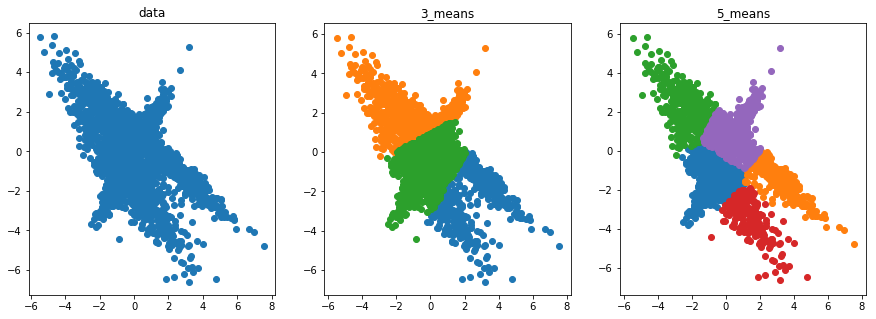

In [18]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.scatter(data[:,0],data[:,1])
plt.title('data')

plt.subplot(1,3,2)
e,mlis = k_means(data,class_num=3)
scatter(data,e,class_num=3)
plt.title('3_means')

plt.subplot(1,3,3)
e,mlis = k_means(data,class_num=5)
scatter(data,e,class_num=5)
plt.title('5_means')

plt.savefig('k_means_artificial.png')

In [19]:
def imrecon(data,e,mlis):
    img_r=np.zeros(data.shape)
    img_r=np.array([mlis[ek] for ek in e])
    img_r=img_r.reshape(512,512,3)
    img_r=np.uint8(img_r)
    return img_r

In [20]:
from PIL import Image

img=np.array(Image.open('Lenna.png'))
data=img.reshape(512*512,3)
n=len(data)

In [21]:
class_num=2
e2,mlis2 = k_means(data,class_num=class_num)

class_num=5
e5,mlis5 = k_means(data,class_num=class_num)

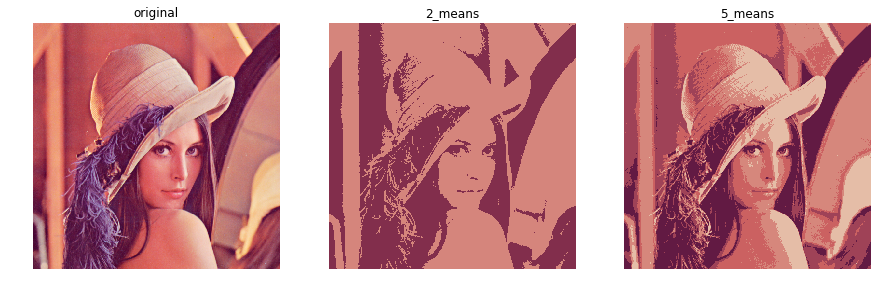

In [22]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
plt.imshow(img)
plt.axis('off')
plt.title('original')

img2 = imrecon(data,e2,mlis2)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.axis('off')
plt.title('2_means')

img5 = imrecon(data,e5,mlis5)
plt.subplot(1,3,3)
plt.imshow(img5)
plt.axis('off')
plt.title('5_means')
plt.savefig('k_means_lena.png')